# KNN Model Training

In this notebook, the KNN model for recommending similar songs for an input song will be trained and evaluated.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler

import seaborn as sns

import pickle

In [19]:
#import aggregated data that was generated in explorative_data_analysis.ipynb
songs_df = pd.read_table("data/spotify_knn_features.csv", sep=",")
songs_df

,acousticness,album_id,artists_id,country,danceability,duration_ms,energy,id,instrumentalness,key,...,Tonnetz_5,Tonnetz_6,ZCR,entropy_energy,spectral_bandwith,spectral_centroid,spectral_rollOff_max,spectral_rollOff_min,artist_names,album_name
0,0.294000,0D3QufeCudpQANOR7luqdr,['3mxJuHRn2ZWD5OofvJtDZY'],BE,0.698,235584.0,0.606,5qljLQuKnNJf4F4vfxQB0V,0.000003,10.0,...,0.005772,0.008440,0.046804,-182.945630,2571.486199,2087.112746,4485.181212,131.157540,['Jesse Markin'],Blood
1,0.863000,1bcqsH5UyTBzmh9YizdsBE,['4xWMewm6CYMstu0sPgd9jJ'],BE,0.719,656960.0,0.308,3VAX2MJdmdqARLSU5hPMpm,0.000000,6.0,...,-0.001622,0.002142,0.058261,-182.432736,2091.303337,1353.341469,3686.694374,416.947479,['Favorite Kids Stories'],"Storytime Classics, Vol. 2"
2,0.750000,4tKijjmxGClg4JOLAyo2qE,['3hYaK5FF3YAglCj5HZgBnP'],BE,0.466,492840.0,0.931,1L3YAhsEMrGVvCgDXj2TYn,0.000000,4.0,...,-0.000190,0.000619,0.079464,-140.088824,2395.523374,2214.499532,4744.154646,472.630475,['Jimmy Carr'],Comedian
3,0.763000,6FeJF5r8roonnKraJxr4oB,['2KQsUB9DRBcJk17JWX1eXD'],BE,0.719,316578.0,0.126,6aCe9zzoZmCojX7bbgKKtf,0.000000,3.0,...,0.001847,0.000928,0.079677,-123.676940,2943.121479,1134.452723,5553.574752,661.029336,['Ambrose Bierce'],The Classic Short Story Collection
4,0.770000,4tKijjmxGClg4JOLAyo2qE,['3hYaK5FF3YAglCj5HZgBnP'],BE,0.460,558880.0,0.942,1Vo802A38tPFHmje1h91um,0.000000,7.0,...,-0.000195,-0.002266,0.082069,-136.104429,2454.667943,2696.457022,4790.462699,480.838759,['Jimmy Carr'],Comedian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101934,0.005640,1M9n4vCmOH4lbcHrpt21Qy,['6n3YUZcayLRuAunJUUelvz'],AR,0.602,178893.0,0.904,4e5wI6VC4eVDTtpyZ409Pw,0.000000,11.0,...,0.012507,0.005284,0.103588,-142.960790,3634.614848,2410.273255,8025.293139,147.265776,['Regurgitator'],Unit
101935,0.000406,511p6iaCuK8Sr0BYdpcfkq,['4iudEcmuPlYNdbP3e1bdn1'],AR,0.177,213133.0,0.823,58nHFSWj5N5JxNtWgS85TL,0.005370,7.0,...,-0.018273,0.005041,0.069840,-115.151474,3237.217308,3549.931783,6042.030131,177.165595,['Silverchair'],Freak Show
101936,0.004510,511p6iaCuK8Sr0BYdpcfkq,['4iudEcmuPlYNdbP3e1bdn1'],AR,0.539,226107.0,0.883,2RDgs05sg2vrpwiAEUkWd0,0.000001,6.0,...,0.000520,0.001425,0.075540,-122.349189,3243.426268,5724.093785,6552.860376,173.090620,['Silverchair'],Freak Show
101937,0.333000,7H3Bgvb3hs4vvLwccHDRlr,['023YMawCG3OvACmRjWxLWC'],AR,0.716,224133.0,0.748,1pXtUVmSS3Aky3j6nQ4sQT,0.000007,9.0,...,0.002582,0.001717,0.069914,-125.446966,3171.583481,2924.314674,6149.954479,230.365274,['The Cat Empire'],The Cat Empire


Now lets start by selecting features that we want to use to identify similar songs. Here are the columns that can be used for model training. This was done manually by selecting numerical features that can be interpreted by the knn classifier. For the low level sound features, some values were excluded after a research about the features:

In [20]:
# select features to use for training the KNN
feature_columns = [
    'acousticness',
    'danceability',
    'duration_ms',
    'energy',
    'instrumentalness',
    'key',
    'liveness',
    'loudness',
    'mode',
    'popularity',
    'speechiness',
    'tempo',
    'time_signature',
    'valence',
    'mean_syllables_word',
    'mean_words_sentence',
    'n_sentences',
    'n_words',
    'sentence_similarity',
    'vocabulary_wealth',
    'spectral_centroid',
    'spectral_bandwith',
    'Chroma_1',     # Most relevant chroma values
    'Chroma_5', 
    'Chroma_8',
    'Spectral_contrast_1', # First tree are most relevant
    'Spectral_contrast_2', 
    'Spectral_contrast_3',
    'Tonnetz_1', # Selected all Tonnetz values
    'Tonnetz_2',
    'Tonnetz_3',
    'Tonnetz_4',
    'Tonnetz_5',
    'Tonnetz_6',
    'MFCC_1', # Take first 13, most important
    'MFCC_2',
    'MFCC_3',
    'MFCC_4',
    'MFCC_5',
    'MFCC_6',
    'MFCC_7',
    'MFCC_8',
    'MFCC_9',
    'MFCC_10',
    'MFCC_11',
    'MFCC_12',
    'MFCC_13',
    'ZCR',
    'spectral_rollOff_min',
    'spectral_rollOff_max',
    'entropy_energy']


Using a heatmap, we can check for strong correlations between features. this could help remove redundant features:

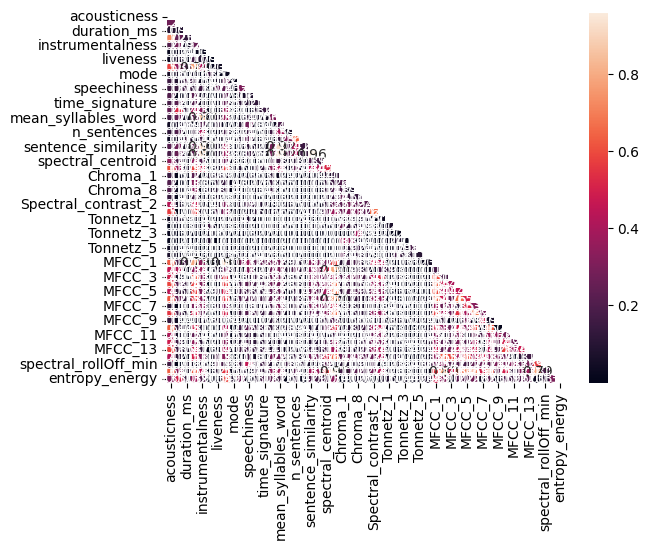

In [21]:
corr_matrix = songs_df[feature_columns].corr().abs() # get absolute correlation to see which values correlate no matter if positive or negative.

mask = np.triu(np.ones_like(corr_matrix, dtype=bool)) # Mask duplicate values to remove redundant correlations

sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f")
plt.show()

This heatmap is hard to interpret due to the amount of features. What we can do is to select features with a correlation over 85%. This can be done like this:

In [22]:
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)) # get absolute correlations, to remove any over a trashhold 
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.85)]
to_drop

['mean_syllables_word',
 'sentence_similarity',
 'vocabulary_wealth',
 'MFCC_1',
 'spectral_rollOff_max']

Now lets remove the correlating values

In [23]:
feature_columns = [item for item in feature_columns if item not in to_drop]

After that is done, the let's remove NaN values before scaling:

In [24]:
songs_df = songs_df.dropna()

These are the final feature columns:

In [30]:
feature_columns

['acousticness',
 'danceability',
 'duration_ms',
 'energy',
 'instrumentalness',
 'key',
 'liveness',
 'loudness',
 'mode',
 'popularity',
 'speechiness',
 'tempo',
 'time_signature',
 'valence',
 'mean_words_sentence',
 'n_sentences',
 'n_words',
 'spectral_centroid',
 'spectral_bandwith',
 'Chroma_1',
 'Chroma_5',
 'Chroma_8',
 'Spectral_contrast_1',
 'Spectral_contrast_2',
 'Spectral_contrast_3',
 'Tonnetz_1',
 'Tonnetz_2',
 'Tonnetz_3',
 'Tonnetz_4',
 'Tonnetz_5',
 'Tonnetz_6',
 'MFCC_2',
 'MFCC_3',
 'MFCC_4',
 'MFCC_5',
 'MFCC_6',
 'MFCC_7',
 'MFCC_8',
 'MFCC_9',
 'MFCC_10',
 'MFCC_11',
 'MFCC_12',
 'MFCC_13',
 'ZCR',
 'spectral_rollOff_min',
 'entropy_energy']

Now we scale the features to ensure distances can be interpreted accordingly.

In [25]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(songs_df[feature_columns])

With the data being scaled now, the next step is to train the model with it. For this let's start with a k to get the five most similar songs. Then we use the cosine metric, which calculates the angle between two vectors. This is done because by comparing angles between two vectors makes it more reliable against scaling,  while euclidean distance measures absolute distance.

In [26]:
# Train knn model
k = 5
knn = NearestNeighbors(n_neighbors=k, metric='cosine')
knn.fit(X_scaled)

NearestNeighbors(metric='cosine')

In [27]:
pickle.dump(knn, open("./model/spotify_recommendation_model.pkl", "wb")) # wb=write binary
knn = pickle.load(open("./model/spotify_recommendation_model.pkl", "rb")) # rb read binary

With the trained model, it is now time to test it by letting it recommend songs for an input. To make that easier to do, let's implement a function for this task:

In [28]:
def recommend_songs_for(song_id: object, knn: NearestNeighbors, k=5):
    song_index = songs_df[songs_df['id'] == song_id].index

    # if no song index was found return
    if len(song_index) == 0:
        return "Song not found!"

    # scale input features to match the input used for training.
    song_features = songs_df.loc[song_index, feature_columns]
    input_song = scaler.transform(song_features)

    # Find nearest neighbours
    distances, indices = knn.kneighbors(input_song, n_neighbors=k+1)
    recommended_songs_ids = indices[0][1:]  # Excluding the first because that is the input itself
    
    recommended_songs = songs_df.iloc[recommended_songs_ids][['id', 'name']]

    return recommended_songs


Aftet that is implemented, let's test it!

In [29]:
y = recommend_songs_for("6oO7WMjD6kEvCITLbVj0mu", knn, k)
y

,id,name
67544,7Hg06GeFWW8rH0SbeXhF1Y,Free at Last
63301,5jsDxDkJ1PqyYUWhDMr86B,Song #3
83729,5vCE0xRLIEG1Zej2tgWFDb,Vasoline
98107,00sydAz6PeOxYzwG1dRIPi,Search and Destroy - Iggy Pop Mix
15227,2MR7jNQNrPt70lI3wiw5O7,Violent Shiver
